In [29]:
from distlink import COrbitData, MOID_fast
from bin_to_df import bin_to_df
import rebound
import numpy as np
import pandas as pd

obj1 = 15789
obj2 = 15810
obj1 = 15760
obj2 = 15807
arc1 = rebound.SimulationArchive('archive_'+str(obj1)+'.bin')
ser1 = bin_to_df(obj1,arc1)
arc2 = rebound.SimulationArchive('archive_'+str(obj2)+'.bin')
ser2 = bin_to_df(obj2,arc2)

# p = np.sin(o.inc)*np.sin(o.Omega)
# h = (o.e)*np.sin(o.Omega+o.omega)
Omega1 = (np.arcsin(ser1['p']/np.sin(ser1['inc'])))/180*np.pi
omega1 = (np.arcsin(ser1['h']/ser1['ecc'])-Omega1)/180*np.pi
Omega2 = (np.arcsin(ser2['p']/np.sin(ser2['inc'])))/180*np.pi
omega2 = (np.arcsin(ser2['h']/ser2['ecc'])-Omega2)/180*np.pi

/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:99: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
dist = np.zeros(len(ser1))
# Create two orbits (angles in radian!)
#COrbitData is in (a,e,i,Omega,omega)
for i in range(len(ser1)):
    o1 = COrbitData(ser1['a'][i], ser1['ecc'][i],ser1['inc'][i]/180*np.pi,Omega1[i],omega1[i])
    o2 = COrbitData(ser2['a'][i], ser2['ecc'][i],ser2['inc'][i]/180*np.pi,Omega2[i],omega2[i])

    # Compute MOID between two orbits.
    MOID = MOID_fast(o1, o2, 2e-15, 1e-15)
    dist[i] = MOID.distance

(6500.0, 6800.0)

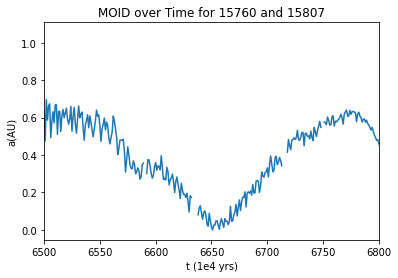

In [31]:
import matplotlib.pyplot as plt

#ind = np.where(dist <= 0.04)[0]
#new = np.zeros(len(dist))
#new[ind] = dist[ind]
hsphere = np.ones(len(dist))*0.002
plt.plot(dist)
#plt.plot(hsphere,c='r')
#plt.ylim(0,0.008)
plt.title('MOID over Time for '+str(obj1)+' and '+str(obj2))
plt.ylabel('a(AU)')
plt.xlabel('t (1e4 yrs)')
#plt.yscale('log')
plt.xlim(6500,6800)

In [38]:
print(39.7*(0.01)*(1e18/3/1.989e30)**(1/3))

2.188795367204737e-05


In [1]:
import pandas as pd
import numpy as np
MPCdat = pd.read_csv('data_files/Distance.txt',index_col=None,sep=',')
MPCdat = MPCdat.drop(columns=['thing','t2','num','thing4','t5','t6','t7','t9','numdes','name','date2' ])
print(MPCdat)

          des          M        aop        lan       inc       ecc  \
0       00944  113.66620   56.49903   21.44365  42.57966  0.661538   
1       02060  192.89992  339.43906  209.30549   6.91806  0.376215   
2       05145  124.02785  354.62199  119.38222  24.66634  0.572041   
3       05335  285.39741  191.11183  314.06456  61.68439  0.865899   
4       07066   91.82203  170.77708   31.38678  15.61739  0.515234   
...       ...        ...        ...        ...       ...       ...   
5131  K23F17C  334.84737  211.76054   41.69177   2.11866  0.450356   
5132  K23G04C  341.64490  160.80646  140.66114  54.62505  0.582012   
5133  K23J03M  348.03136  111.00772  178.35852   8.79659  0.660578   
5134  K23J04F  302.00088  202.78366  142.32486  15.63884  0.409546   
5135  K23J04Y  351.53045   64.43140  266.40345  35.86987  0.562164   

               n         sma      Name  
0     0.07187610   5.7290115   Hidalgo  
1     0.01940899  13.7130511    Chiron  
2     0.01077430  20.3022086    Phol

In [5]:
data = []
for i in range(len(MPCdat)):
    print(i)
    dist_pd = []
    distlist = []
    obj1 = MPCdat['des'][i]
    for j in range(i+1,len(MPCdat)):
        obj2 = MPCdat['des'][j]
        
        #print(MPCdat['sma'][i],MPCdat['ecc'][i])
        try:
            apo = float(MPCdat['sma'][i])*(1+MPCdat['ecc'][i])
            per = float(MPCdat['sma'][j])*(1-MPCdat['ecc'][j])
        except:
            continue
            
        if len(np.where(abs((apo - per)) <= 0.1)[0]) > 0:
            distlist.append(j)
    
    dist_pd.append(str(obj1))
    dist_pd.append(distlist)
    
    data.append(dist_pd)

dist_df = pd.DataFrame(data,columns=['Name','obj_ind'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


In [37]:
from distlink import COrbitData, MOID_fast
datamoid = []
#for i in range(4500,len(dist_df)):
for i in range(len(dist_df)):
    #print(i)
    dist_pd = []
    distlist = []
    obj1 = MPCdat['des'][i]
    try:
        o1 = COrbitData(float(MPCdat['sma'][i]), MPCdat['ecc'][i],MPCdat['inc'][i]/180*np.pi,MPCdat['lan'][i]/180*np.pi,MPCdat['aop'][i]/180*np.pi)
    except:
        dist_pd.append(str(obj1))
        dist_pd.append(distlist)
    
        datamoid.append(dist_pd)
        continue
    tracker = []
    for j in dist_df['obj_ind'][i]:
        obj2 = MPCdat['des'][j]
        o2 = COrbitData(float(MPCdat['sma'][j]), MPCdat['ecc'][j],MPCdat['inc'][j]/180*np.pi,MPCdat['lan'][j]/180*np.pi,MPCdat['aop'][j]/180*np.pi)

        try:     
            o2 = COrbitData(float(MPCdat['sma'][j]), MPCdat['ecc'][j],MPCdat['inc'][j]/180*np.pi,MPCdat['lan'][j]/180*np.pi,MPCdat['aop'][j]/180*np.pi)
        except:
            continue
       
        # Create two orbits (angles in radian!)
        #COrbitData is in (a,e,i,Omega,omega)
        
        
            # Compute MOID between two orbits.
        MOID = MOID_fast(o1, o2, 2e-15, 1e-15)
        dist = MOID.distance
        print(dist)
        if dist <= 0.1:
            tracker.append(str(obj2))
    
    dist_pd.append(str(obj1))
    dist_pd.append(tracker)
    
    datamoid.append(dist_pd)

moid_df = pd.DataFrame(datamoid,columns=['Name','dist_obj'])

3.6449470189777786
3.645225303517435
7.367113761383359
6.289865897833595
4.7674846099846135
6.176976389218837
10.377376436156572
4.78805616255482
4.245361143012983
1.4400400977121501
2.9557119587718934
6.026756191708159
8.335372645007626
9.103167221456538
12.317659536970837
11.050572804789605
19.07042385888052
15.233506039806448
10.341683497366743
19.352907128582522
16.1243981859078
11.573736738222275
6.176488666886755
12.566665511948838
7.660182129880013
11.7620697601459
11.6881548104672
6.873146073486291
12.642828081771812
4.101821181837988
18.369743878089125
11.413691211868201
19.104021362918466
10.681002985971658
16.47526756530351
15.51582104776508
14.60054452198238
11.094389342704426
12.371323179858633
13.31284935588748
12.885109283990115
6.101433626652452
16.47361586185471
15.123531290303744
12.132217540487565
11.797120856281662
13.435585146505847
23.259987185984436
9.234440005314013
12.007638748426476
18.59652654125732
9.994044855217675
16.037726231795354
10.487349609528028
11.2

3.402351281944193
1.4085233437224756
0.3856975606566752
0.6738884928345638
0.3429212815762983
1.5473712791240037
2.2869541751543876
5.406859612955468
1.8935996176423706
1.2744914374328384
1.410028914832699
1.8605689901890918
3.1867388585732592
0.48268343157986854
0.6553056226729251
4.664118542019147
4.4597058136502294
1.4850910651030693
0.2267386633558649
3.925579731083932
0.7830537187124145
2.504291879038541
3.0525698635057177
3.6615768431276634
4.419544199675911
1.7611902907236106
4.667620861687949
13.032338727912075
6.715299140307972
2.5095382667371693
1.4035131895333302
14.29808805666486
2.1429500912405866
4.115218408388813
2.2376472215284995
0.2205603748133232
1.738558287643764
0.1993889915867102
0.5648385014560455
8.3327758903731
1.853055360434971
1.0914737852355434
0.6184828391970992
3.2473947659136035
0.5432323738352143
3.6789650197257555
4.271154827212148
2.779296718548592
4.485291873696268
1.939189700650136
1.3423551370229412
3.30894425253201
0.7071150953675699
0.469418681265

1.751750047542282
7.8504493274948794
0.24397040207570617
12.189587806321322
2.8090445442146006
12.641665531000235
11.466782430826383
7.715676984020744
6.873143757293195
4.8067291813111845
21.780985679747374
13.181239927533857
9.75132678563981
4.735135142900027
13.712811249065242
4.130590419725046
6.6161110008294575
4.449242134928292
16.509016114728595
12.812865003433894
6.470005734878965
4.217624231253457
2.2540126604373514
7.911166997218209
13.480464727351483
6.34207888270688
2.320544286261531
2.660697003198326
7.867234117957927
8.414058394345615
19.68420311796162
8.499891643999652
10.110188635752559
13.71295888416012
9.775427203615038
3.1812724755425767
11.571906532455811
1.3901185279808
10.8737866799419
7.5982014493893715
5.288956219944113
9.196263482828336
3.925579283065956
11.30264254740587
7.777772885742981
11.452584315013969
6.653359087181795
1.1146772536475604
0.8229842347065498
0.3232006738853186
3.1975623898802077
5.769102843864045
9.490920007080886
13.754135268207817
9.79176

7.791493963189307
5.834447419933084
3.9342344768618296
0.1254567986085863
7.606587786849465
2.168484187749559
1.9630903527826753
0.7885830996481576
0.5518662539403638
2.067222549472199
0.5960079443670148
2.3801865974095118
2.5780090784826895
3.159953333066236
6.7499837466135135
13.68773128277049
9.843651161862734
8.123347516904365
10.596085292096232
8.032286883214129
17.267878320206272
3.1040942021638336
8.355861640405536
14.832668665147134
7.510085238894643
16.56894126852747
9.716748129524108
12.532112240700696
5.603329739251528
12.064233202528854
11.107322666139737
3.84952985733266
8.980745773366289
4.481394089690151
12.382746094416778
17.91320102354783
17.23692029609125
8.95631079081684
4.525841351549293
14.513952190749107
7.301288256355035
14.724866431616574
4.498587195261948
19.16138248108098
16.912774397951477
7.285827749795303
16.641020743703386
1.1372337125883878
7.868481572758946
12.243814870999557
10.439191527777963
13.458492899614217
4.693774945531615
11.120583112748218
5.47

1.635133872393765
1.5454527335406105
0.23156469959875803
0.3298555210442474
5.777156927734929
6.267105684202593
1.0012358291031307
5.662622719371051
3.216870896954091
0.41128991561283823
0.15181916416325672
0.1110405021381378
0.3236826345841035
0.24560510699231305
0.18937212677503298
2.5385194426291116
0.4021131636796991
5.3220546892574125
8.959211169958026
0.07757915492161971
0.241174187967626
0.3524381658651881
0.7162018871850382
1.7531754776757682
0.5258223987539212
2.375680738175763
6.861092873194027
6.078642773303548
5.233570143945756
5.676632241084356
3.2419926636244782
0.6045193161859579
1.3877742426900859
1.487524062508324
1.3015217111683592
1.766913591721539
1.030109982544011
1.4363213796846326
1.9300836238479082
2.007403788210144
7.737307135260141
9.330415653198516
0.2506880890692663
6.243947464947664
5.177737365833622
2.3355347136448255
3.8912452832359907
7.26392820594327
3.252359462854528
10.873891653257933
6.695839658841005
1.6504386076230348
9.171316109179434
10.679694939

0.6677097471808972
1.239469412146784
4.616997730832145
3.837071422720241
5.85856874917795
7.648627206774676
1.2848482992767964
2.7070535103854083
1.9895890837510433
2.0371641572966173
2.352401368157671
1.9669102779282663
0.011525824943318413
7.060047484886191
3.7440336814520743
2.1474108564181535
10.560921787639886
1.0739363208163313
1.4012360092752163
1.6250413752484545
1.8556106886257955
2.6304335498615377
0.17720861987309425
2.758622197354452
2.3888129658573627
2.34775932872768
4.224623986555369
2.3733337306002715
0.6299790906358944
9.078924734823039
1.0629532844344736
4.041861072985347
2.980275712661407
3.1886884946909335
4.350715078791617
7.950982000907473
4.039234431892716
2.945170900324698
3.6129019803394677
8.809984067648188
1.5744014037322296
6.608145346368409
3.4643412129161297
0.9440168164117684
3.305212347512856
2.5056901845282886
6.389831872098373
2.88405826462204
1.5007491780151314
7.997875704613036
2.7792412657971517
2.050590101635978
2.802436511431404
4.353827631565186


3.470347759693585
3.8354134637243473
5.676065968177216
2.109833812466505
1.5493066523790178
2.2400916588358104
1.3045905250141254
4.437775785024315
0.6918313608680008
1.2516267389995896
1.9621019907671569
2.380201282211733
2.6054800481119442
1.6842471918738395
7.9676004028365845
2.5899838412687304
4.735429678853335
2.309459100973709
2.577590839346408
1.7383497395461227
0.8149924046164175
3.508552344048123
0.9910560265592409
5.436188602275115
1.3237311099255007
0.7428921310281149
0.19314533060603764
1.4088180857413606
3.2991893313401026
0.6736942254437553
0.8978270491027175
2.632193044437456
8.29698264438021
2.179723927732647
3.0339959727977486
0.7590897861950532
32.7088867736384
11.090333173945401
3.878993636267632
17.61676100091532
20.141298660782677
25.90494425086351
22.016237992462308
22.641060714199615
23.897246837740838
21.204142877072897
18.367713552377626
23.32442825521623
26.963561748795918
21.618364429433626
32.34953683307863
37.51118888821444
36.46681682336162
25.617227754218

93.52701845798435
0.09439080000000165
86.07831856234911
88.6257082258644
88.4910201744219
0.6791588511983186
20.737874534866766
88.62357853340967
53.64081697487112
83.56434090194276
17.074324969164806
83.52371175354911
0.12699897502095928
83.50850681088804
5.244390969573109
83.48573359609976
0.15371109084275258
83.62049201097425
83.6587418198839
2.353619332289901
2.9254119606063793
4.222171019641259
83.50714731459603
83.50624709659562
3.415160167546508
82.9514189568937
86.22267471557078
83.60596065554182
28.160955144337603
7.534714871292412
2.84669690546277
83.61718432540103
83.58787236780573
83.46504638040095
0.007317597566311936
83.4949797347743
83.60166088122536
83.51311735294044
0.11261345303817176
1.126492927436949
83.53997623435721
83.51360240475671
84.09827831608803
83.44476965635168
3.597095881412135
83.50637677091147
0.014976657448346685
0.10340313228829864
83.57919037974311
49.42357757752424
87.44741693180228
5.084926218241268
22.724879956257187
0.6073135977672763
83.64570192

82.75234503836494
75.00308734622055
0.19795663475364716
88.1898838677061
82.74186378732531
2.121548003747321
1.9769929703252873
0.1972020528406661
82.87281751920338
82.68222842691367
2.6394965937971526
83.58349105690759
7.085823752532429
83.70386676411198
1.8587762378984005
63.60857382226349
0.9955102423880865
0.3188495727663
5.255277738456782
83.65666370110434
83.69863482818366
83.55598344001876
0.0015823312944755383
83.80522931091656
1.0668377730827967
83.67435599391666
86.42468067107616
0.02239111229146546
28.326874774483308
83.62556319110345
54.05566217342582
41.565851996424485
83.7234456838282
54.36775851378243
83.56947061292115
83.50184831246473
2.199282866718148
83.63054261207132
80.31888906173019
0.7261289204078812
2.7705950187604595
83.50455575976704
35.14861837534575
0.6142371370689735
83.74120861617247
0.06775642633224407
4.773273124228932
1.5694292598274393
0.3739471448199404
83.56001755087831
83.59409809533379
83.61287768010187
0.9623332414639987
1.1129199357052029
10.1758

0.47056633600745174
84.54225820366815
6.563130059473141
84.45006536198744
17.132749529686315
5.717540906678269
3.155729995370886
0.766980797336885
11.739905418086423
0.9228798589898315
0.09906698091611282
0.13961870024283732
0.3409011267482226
2.0564652366619387
4.332570788672145
0.7281208046614982
5.96972230193944
10.306983368256029
8.379330220657941
5.046455369197309
10.003390789374746
11.458401957400111
6.298770487798956
6.372075952292222
3.9008011130023696
10.97903089656098
3.772873102404273
9.87941933767178
10.958374188864328
6.37936925822376
4.0309232225896094
8.582241924637701
10.797574821316086
1.4550116931919155
2.9576947546957335
4.234714944444362
9.210710322528007
2.597523070628398
0.39059292734649675
8.131367691767808
9.331854997834297
5.331359481100815
1.8046564279502468
86.41860171194129
4.536916312572076
86.285744
86.28872143849365
86.34443888088576
86.31991217104414
2.5925391715302264
5.797585981833896
86.37872502502809
91.03024146427308
86.29276167102391
0.050445447437

5.774862354337439
2.2925557601683715
10.614728127058548
6.766512254982222
3.2872213086559925
5.2109528306875115
3.09970669995961
2.430038575212465
18.942709342184354
7.3320465042976615
7.774408785619943
0.22788220054808583
5.183704761196181
9.058837124909358
11.999041044505917
11.998514743933645
3.240485932638131
12.119757343838057
8.008964327088588
8.172233735267183
7.659077533338597
3.4657004946771055
4.364996688859001
17.026187811711132
3.9659398769697103
64.53513700221522
5.487871772936106
28.78939137773362
87.31129027010776
87.32964782407663
13.21050893213792
87.28264445629793
87.13492818584895
87.0526419365322
87.30915516460894
87.3174782165446
0.09129372903318737
87.22312116702356
11.554185416330075
0.1055706621778537
3.3107760073458663
5.0853648487673535
3.261120882986338
4.109598684810055
3.3693157996967846
3.863973446224103
4.213328036207334
2.9604699091992264
5.392535944995871
6.879938941268232
4.673141812374385
3.520411338653008
4.113000374286824
3.4011586195421684
3.845001

0.23514205429061133
0.7805645019599756
0.6110004607109156
8.729168854774862
1.5398887069650256
32.32337211851751
19.383587491261547
27.6876964818562
26.177620170331306
27.658921367886318
5.043971988601141
15.340251298109772
26.787314636764158
16.003999272445494
14.732499138243858
4.379394255882954
18.237423733583356
19.266030239362774
15.853096707733203
23.983847160861615
19.07442423916763
14.257188461644812
13.62363892663759
19.118856361246404
17.3779264533224
22.124362366775802
21.366697363085766
7.8733190018340835
12.929301425957311
21.93199639161035
21.67866845910768
24.730695006520772
5.022429593461971
36.70831284802873
28.069089532142144
35.864990225372125
22.920509233911236
10.91871257682879
14.463238896509969
2.0958015530879357
17.81322652817461
16.652328154077
13.565132842176093
2.937940759937531
3.7294471005744114
8.312744537969518
5.8143780685085655
3.0498382310667207
14.179252278781345
5.999553561440703
4.557237863864786
14.066233385948825
9.140218652526924
4.80373475082592

0.4037933818054624
12.854489285062593
5.975779047698187
5.2008835593681475
0.31595777210773907
1.0408159469828588
1.9220445199383531
1.5089106904736154
1.060337530251538
2.646670968803222
0.9200914723361356
2.3852522589919953
0.11899924004012126
1.6753240681567834
4.2111656611240615
6.676089186326674
3.4201519228197292
4.762878711613503
3.4772195188433446
1.1315500207883638
0.785567551728384
6.310309531122364
5.846641972050157
1.4028505691439335
4.470669626006552
2.8848315390496113
3.498680680689239
8.92127145647518
4.443022895454683
0.9372644263258662
5.466887013544503
5.171629151595362
6.0483086262506705
1.527009966554615
4.008983600134664
0.738416011006506
15.752276569295859
3.0106542977985087
16.992667025771073
2.8905294090947296
15.298069241694058
0.9504214109482884
7.9531524544127
3.0145314177147933
2.1366174262506386
19.234961655040987
5.823204191042929
12.924461232543816
15.806105828492592
15.651738053488067
5.995251680366831
2.1600502251142113
15.6348129774245
6.06429595478190

9.174131784990028
1.2972083714793
1.7459729705345084
3.539813887032505
1.3704496323879851
1.3046766624765924
0.3382084009817561
0.8678600639240749
0.08535065780482756
0.4028319345484368
1.8709154400692602
1.3425160462454184
9.076123338140258
17.06987058767269
1.256293088159459
8.580318184652052
2.6453722256296897
1.2182404392420405
0.3572990116694414
1.051657958243898
3.942285079372585
0.25565304904893255
0.006516982221065473
0.3646876478630269
2.112753380388509
3.1980400435728686
3.066540130661165
2.1008213982318638
4.010522895515256
0.034463648889537894
3.7932313863847558
0.12883653130700323
0.43742361323927953
1.1759751566195895
1.5987387008242495
0.06370179908801428
1.4844530639126636
1.1760407009448595
1.314381578634267
1.3109447378802537
0.014563181028427843
1.2420580426819652
3.13942460151459
2.0029316980705265
1.8223154306934386
6.378611242462374
4.468542660342913
2.851265890833111
0.3496612284391597
2.1812938006666807
0.4695919354647085
3.598233829732434
0.6108122920365378
3.2

7.081202532787094
0.5055158452248872
3.0694229218696276
1.5889540790339696
5.63341502822833
2.2935992574428403
5.277056315173589
2.9371404492410385
3.528298248725443
3.0707010887280117
4.3601106643673235
1.801361297549014
6.1129329051673285
9.734917440512218
2.7437103634254014
8.451221003763983
8.098359167027608
3.3439237620326465
3.0261128110216915
2.092382370392697
3.957437449635622
2.2297813038988172
1.2740317200996976
0.936047346171961
2.226168416759711
4.152812626853401
0.5723415967344527
3.3485145826211866
1.0101201730127023
3.08774019463083
3.740001691558371
2.6379013681881216
0.11573593727642005
5.843719263520859
3.7408152479807666
2.260179340214322
4.307968176313869
2.0681450079856787
0.39424903348335094
0.9442421629509378
9.071417185303453
2.352564035980534
2.2652548566941473
2.3122169143959774
0.13987966697539916
0.8144470687478439
9.151060363444625
14.680511404427788
19.713437263505817
14.61528626975333
8.843196359658851
8.84801616325383
10.175255574739147
11.07107207857731

18.546264401101595
12.454000582090432
14.644721182140966
14.30879760230586
14.658345105864543
4.693554799460921
6.794411749197134
14.757405329179825
15.646239560111145
3.7659129613112063
21.602251143463874
10.78776578326234
10.852417701571785
2.3494679541259043
18.217473964155225
22.52026159938049
30.85776457021138
5.050226312535352
25.46609342823324
5.56280694352289
11.662966227908383
7.256056069660847
22.77910478126579
2.0474310947170737
2.793815534661651
2.775077068621272
4.57195624050405
21.503413628891227
21.32233343902249
5.586437007167803
1.9359364964067656
7.037907546050535
3.7267883517679974
4.942072698078381
2.9212052802231345
2.994313709335497
1.038450225086533
5.078220349448204
0.05174430081768934
6.709952213822304
4.097458027422603
4.43537222782835
4.448905220686999
6.935533727999192
1.6138128480034502
8.174944421801047
15.047221279068639
1.1596716741107649
6.639570141370477
4.8255251733494635
1.8872497209565624
5.443488346004421
5.076953340141787
2.980010697281222
4.92505

9.30486994918884
1.4893439903882166
3.1808869476047605
8.068867776263541
5.571809442007289
5.978644383951729
1.3423198112540202
4.465497022755343
7.953655660129267
7.913296672059256
21.025562565255676
2.2374061281830433
3.1698071905953014
1.8910541604789823
43.62362571440321
1.0767240131476645
1.681809741509924
9.365164641509281
2.4084449362263287
3.7204933417260357
1.2377113806713211
2.745935383189732
9.927394670778625
2.2497416854144636
0.7276020095309705
1.4088457417214018
0.5222091491557452
2.6434305391155117
0.8015956549845819
1.3375294845443677
2.185436887480555
22.397368506508478
1.5127456842485547
1.9413655604117297
0.15355426884907072
1.1338265835721684
1.6126126764356137
2.436175496510613
1.1660906503390185
2.9256401806079433
12.263021383577145
7.822587886765386
2.4796669008328815
5.911319192098999
3.1088258583903796
1.9453591233695817
3.8042007602501493
1.2767663020826212
6.329471772463952
6.232777390411924
3.028226458012811
7.5877892869237735


In [38]:
print(moid_df)
moid_df.to_csv('data_files/moid_dist.csv')

         Name dist_obj
0       00944       []
1       02060       []
2       05145       []
3       05335       []
4       07066       []
...       ...      ...
5131  K23F17C       []
5132  K23G04C       []
5133  K23J03M       []
5134  K23J04F       []
5135  K23J04Y       []

[5136 rows x 2 columns]


In [45]:
from distlink import COrbitData, MOID_fast
distmoid = []
#for i in range(4500,len(dist_df)):
distlist = []
for i in range(len(dist_df)):
    print(i)
    dist_pd = []
    
    obj1 = MPCdat['des'][i]
    try:
        o1 = COrbitData(float(MPCdat['sma'][i]), MPCdat['ecc'][i],MPCdat['inc'][i]/180*np.pi,MPCdat['lan'][i]/180*np.pi,MPCdat['aop'][i]/180*np.pi)
    except:
        dist_pd.append(str(obj1))
        dist_pd.append(distmoid)
    
        datamoid.append(dist_pd)
        continue
    tracker = []
    for j in range(i+1,len(MPCdat)):
        obj2 = MPCdat['des'][j]

        try:     
            o2 = COrbitData(float(MPCdat['sma'][j]), MPCdat['ecc'][j],MPCdat['inc'][j]/180*np.pi,MPCdat['lan'][j]/180*np.pi,MPCdat['aop'][j]/180*np.pi)
        except:
            continue

        MOID = MOID_fast(o1, o2, 2e-15, 1e-15)
        dist = MOID.distance
        distmoid.append(dist)

all_moid = distmoid

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


Text(0, 0.5, 'Count in Bin')

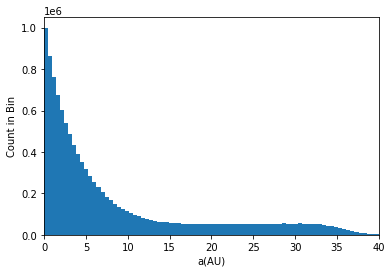

In [55]:
import matplotlib.pyplot as plt
import numpy as np
#ind = np.where(all_moid <= 45.0)[0]
plt.hist(all_moid,bins=500)
plt.xlim(0,40)
plt.xlabel('a(AU)')
plt.ylabel('Count in Bin')

Text(0, 0.5, 'Count in Bin')

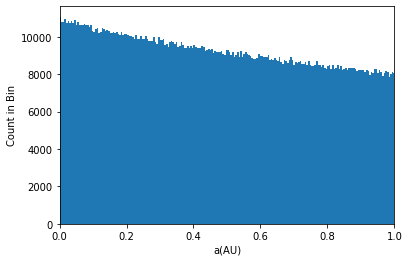

In [57]:
import matplotlib.pyplot as plt
import numpy as np
#ind = np.where(all_moid <= 45.0)[0]
plt.hist(all_moid,bins=50000)
plt.xlim(0,1)
plt.xlabel('a(AU)')
plt.ylabel('Count in Bin')

In [22]:
#d_na_par = []
d_par = []
close = []
G = 6.67e-20
ka = 5/4
kei = 2
kang = 1e-5
#for i in range(4500,len(dist_df)):
for i in range(len(MPCdat)):
    if i%500 == 0:
        print(i)

    #obj1 = MPCdat['des'][i]
    for j in range(i+1,len(MPCdat)):
        #obj2 = MPCdat['des'][j]

        try:  
            dist = np.sqrt(ka*((float(MPCdat['sma'][i]) - float(MPCdat['sma'][j]))/float(MPCdat['sma'][i]))**2+kei*(MPCdat['ecc'][i] - MPCdat['ecc'][j])**2+kei*(np.sin(MPCdat['inc'][i]/180*np.pi) - np.sin(MPCdat['inc'][j]/180*np.pi))**2+kang*(MPCdat['lan'][i]/180*np.pi - MPCdat['lan'][j]/180*np.pi)**2+kang*(MPCdat['aop'][i]/180*np.pi - MPCdat['aop'][j]/180*np.pi)**2)
        except:
            continue
        #d_na_par.append(dist)
        a = float(MPCdat['sma'][i])
        n = float(MPCdat['n'][i])
        d_par.append(dist*n*a)
        
        if dist*n*a*1000 < 1:
            print('Below 1 m/s with obj ', MPCdat['des'][i], ' and obj ',MPCdat['des'][j])
            close.append(MPCdat['des'][i])
            close.append(MPCdat['des'][j])
np.savetxt('data_files/d_par.txt',np.array(d_par))
np.savetxt('data_files/pairs_1ms.txt',np.array(close))

0
Below 1 m/s with obj  D4860  and obj  K13SA0W
Below 1 m/s with obj  I3595  and obj  K20K53G
Below 1 m/s with obj  c5437  and obj  K15G57B
Below 1 m/s with obj  o0839  and obj  K15G58Z
500
Below 1 m/s with obj  q3615  and obj  K15RR9T
Below 1 m/s with obj  q3615  and obj  K15VG9A
Below 1 m/s with obj  q3780  and obj  K15G58A
Below 1 m/s with obj  r1076  and obj  K20B63Q
Below 1 m/s with obj  r5018  and obj  K21D15N
Below 1 m/s with obj  r6919  and obj  K21L43Y
Below 1 m/s with obj  v8833  and obj  z7103
Below 1 m/s with obj  y9222  and obj  K01QT7Z
Below 1 m/s with obj  z2026  and obj  K15VH3F
Below 1 m/s with obj  z2049  and obj  K15VH0V
Below 1 m/s with obj  z2092  and obj  K15VH3B
Below 1 m/s with obj  z2157  and obj  K15G57G
Below 1 m/s with obj  z2174  and obj  K16R82H
Below 1 m/s with obj  z2213  and obj  K02PH0Z
1000
Below 1 m/s with obj  z2333  and obj  K01QT7Z
Below 1 m/s with obj  z2333  and obj  K15VG8R
Below 1 m/s with obj  z2388  and obj  K13SA0X
Below 1 m/s with obj  z25

TypeError: Mismatch between array dtype ('<U7') and format specifier ('%.18e')

11594520


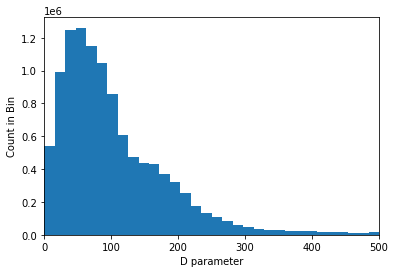

In [3]:
import matplotlib.pyplot as plt
import numpy as np

dist = np.loadtxt('data_files/d_par.txt')
print(len(dist))
#ind = np.where(all_moid <= 45.0)[0]
plt.hist(dist*1000,bins=500)
plt.xlim(0,500)
plt.xlabel('D parameter')
plt.ylabel('Count in Bin')
plt.show()

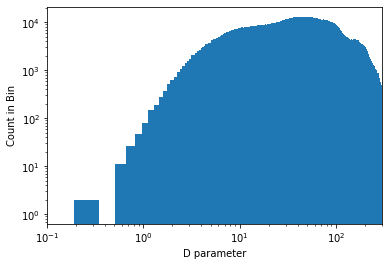

In [8]:
import matplotlib.pyplot as plt
import numpy as np
#ind = np.where(all_moid <= 45.0)[0]
plt.hist(dist*1000,bins=50000)
plt.xlim(0.1,300)
plt.xlabel('D parameter')
plt.ylabel('Count in Bin')
plt.xscale('log')
plt.yscale('log')

11594520


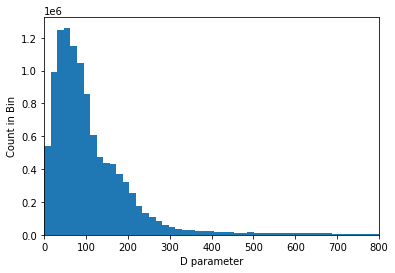

In [10]:
import matplotlib.pyplot as plt
import numpy as np

dist = np.loadtxt('data_files/d_par.txt')
print(len(dist))
#ind = np.where(all_moid <= 45.0)[0]
plt.hist(dist*1000,bins=500)
plt.xlim(0,800)
plt.xlabel('D parameter')
plt.ylabel('Count in Bin')
plt.show()

In [19]:
print(np.where(dist*1000 < 0.5)[0])

[ 7392491 11491236]


In [27]:
print(close)

['D4860', 'K13SA0W', 'I3595', 'K20K53G', 'c5437', 'K15G57B', 'o0839', 'K15G58Z', 'q3615', 'K15RR9T', 'q3615', 'K15VG9A', 'q3780', 'K15G58A', 'r1076', 'K20B63Q', 'r5018', 'K21D15N', 'r6919', 'K21L43Y', 'v8833', 'z7103', 'y9222', 'K01QT7Z', 'z2026', 'K15VH3F', 'z2049', 'K15VH0V', 'z2092', 'K15VH3B', 'z2157', 'K15G57G', 'z2174', 'K16R82H', 'z2213', 'K02PH0Z', 'z2333', 'K01QT7Z', 'z2333', 'K15VG8R', 'z2388', 'K13SA0X', 'z2549', 'K15VH2Z', 'z2573', 'K03Q90T', 'z2581', 'K15Ta1P', 'J95K01J', 'K04O12L', 'J99D08E', 'K02G33B', 'J99D08L', 'K01XP4W', 'J99H11S', 'K02G32K', 'J99O03Z', 'K13SA2T', 'K00CA4M', 'K02CF4Y', 'K00CB4N', 'K15VG9S', 'K00F08H', 'K04M08T', 'K00F53S', 'K13SA1C', 'K00GE6X', 'K01OA9G', 'K00P30M', 'K09M10A', 'K00P30M', 'K15VH3M', 'K00P30N', 'K04XJ0X', 'K00P30N', 'K15RS0D', 'K00QM6F', 'K02VD1C', 'K00SX1G', 'K01QT7V', 'K00SX1G', 'K02TU1A', 'K00W12V', 'K03Q91D', 'K01K76Y', 'K15VG5N', 'K01OA8K', 'K13SA0V', 'K01OA8K', 'K15G59C', 'K01OA8Y', 'K13V46L', 'K01OA8Z', 'K05JH9O', 'K01OA8Z', 'K15

In [28]:
close

['D4860',
 'K13SA0W',
 'I3595',
 'K20K53G',
 'c5437',
 'K15G57B',
 'o0839',
 'K15G58Z',
 'q3615',
 'K15RR9T',
 'q3615',
 'K15VG9A',
 'q3780',
 'K15G58A',
 'r1076',
 'K20B63Q',
 'r5018',
 'K21D15N',
 'r6919',
 'K21L43Y',
 'v8833',
 'z7103',
 'y9222',
 'K01QT7Z',
 'z2026',
 'K15VH3F',
 'z2049',
 'K15VH0V',
 'z2092',
 'K15VH3B',
 'z2157',
 'K15G57G',
 'z2174',
 'K16R82H',
 'z2213',
 'K02PH0Z',
 'z2333',
 'K01QT7Z',
 'z2333',
 'K15VG8R',
 'z2388',
 'K13SA0X',
 'z2549',
 'K15VH2Z',
 'z2573',
 'K03Q90T',
 'z2581',
 'K15Ta1P',
 'J95K01J',
 'K04O12L',
 'J99D08E',
 'K02G33B',
 'J99D08L',
 'K01XP4W',
 'J99H11S',
 'K02G32K',
 'J99O03Z',
 'K13SA2T',
 'K00CA4M',
 'K02CF4Y',
 'K00CB4N',
 'K15VG9S',
 'K00F08H',
 'K04M08T',
 'K00F53S',
 'K13SA1C',
 'K00GE6X',
 'K01OA9G',
 'K00P30M',
 'K09M10A',
 'K00P30M',
 'K15VH3M',
 'K00P30N',
 'K04XJ0X',
 'K00P30N',
 'K15RS0D',
 'K00QM6F',
 'K02VD1C',
 'K00SX1G',
 'K01QT7V',
 'K00SX1G',
 'K02TU1A',
 'K00W12V',
 'K03Q91D',
 'K01K76Y',
 'K15VG5N',
 'K01OA8K',
 'K13S